In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Project_1_Data.csv', delimiter = ',')

In [30]:
# Median and IQR for Male Data
male_median = np.median(df['Male'])
male_iqr = stats.iqr(df['Male'])

# Median and IQR for Female Data
female_median = np.median(df['Female'])
female_iqr = stats.iqr(df['Female'])

print("Median and IQR for Male Data:")
print("Median:", male_median)
print("IQR:", male_iqr)
print()
print("Median and IQR for Female Data:")
print("Median:", female_median)
print("IQR:", female_iqr)

Median and IQR for Male Data:
Median: 6435.0
IQR: 4552.25

Median and IQR for Female Data:
Median: 6489.5
IQR: 5192.0


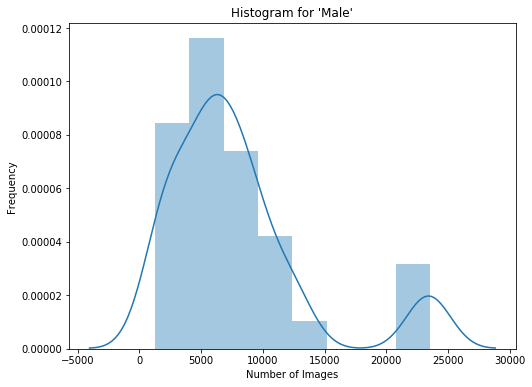

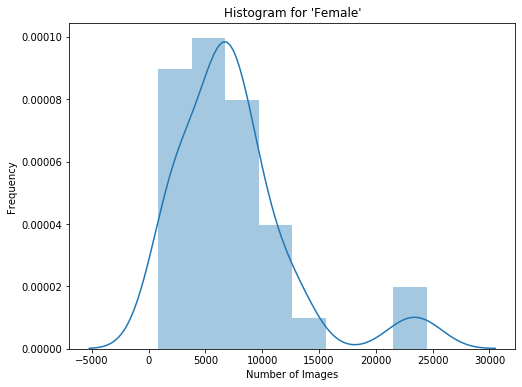

In [5]:
# Generating Histograms
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[col], hist=True, kde=True)
    plt.title(f"Histogram for '{col}'")
    plt.xlabel('Number of Images')  # Add x-axis label
    plt.ylabel("Frequency")  # Add y-axis label
    plt.show()

In [6]:
# we can observe from above plots that both male and female data is right skewed which can also be calculated with the code below
for col in df.columns:
    skewness = df[col].skew()
    print(f"Skewness for '{col}': {skewness}")
    
    if skewness > 0:
        print(f"The data for '{col}' is right-skewed.")
    elif skewness < 0:
        print(f"The data for '{col}' is left-skewed.")
    else:
        print(f"The data for '{col}' is perfectly symmetrical.")

Skewness for 'Male': 1.6629016862392292
The data for 'Male' is right-skewed.
Skewness for 'Female': 1.7498658928396815
The data for 'Female' is right-skewed.


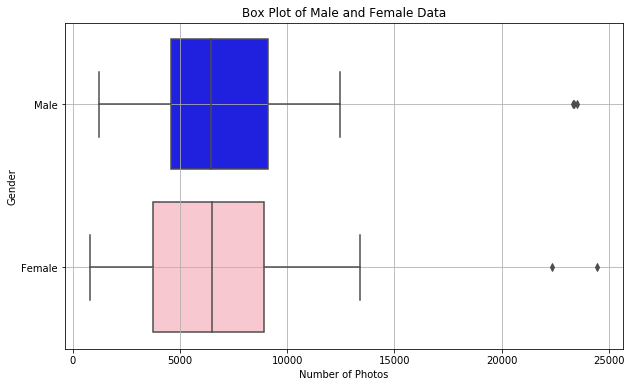

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, orient='h', palette=['blue', 'pink'])
plt.ylabel('Gender')
plt.xlabel('Number of Photos')
plt.title('Box Plot of Male and Female Data')
plt.yticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.grid(True)
plt.show()

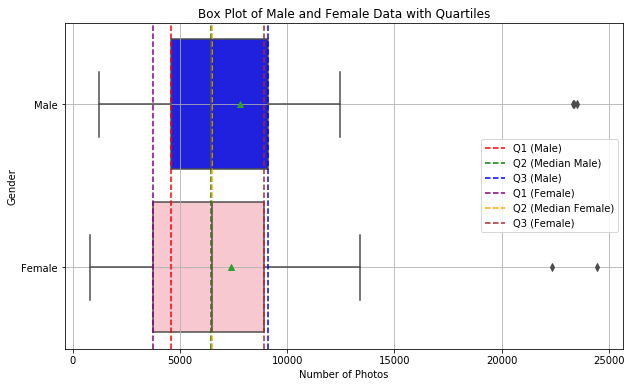

In [27]:
# Calculate quartiles
q1_male = df['Male'].quantile(0.25)
q2_male = df['Male'].quantile(0.5)
q3_male = df['Male'].quantile(0.75)

q1_female = df['Female'].quantile(0.25)
q2_female = df['Female'].quantile(0.5)
q3_female = df['Female'].quantile(0.75)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    orient='h',
    palette=['blue', 'pink'],
    showmeans=True  # optional: show the mean with a diamond
)

# Add quartile markers
plt.axvline(x=q1_male, color='red', linestyle='--', label='Q1 (Male)')
plt.axvline(x=q2_male, color='green', linestyle='--', label='Q2 (Median Male)')
plt.axvline(x=q3_male, color='blue', linestyle='--', label='Q3 (Male)')

plt.axvline(x=q1_female, color='purple', linestyle='--', label='Q1 (Female)')
plt.axvline(x=q2_female, color='orange', linestyle='--', label='Q2 (Median Female)')
plt.axvline(x=q3_female, color='brown', linestyle='--', label='Q3 (Female)')

# Customize the plot
plt.xlabel('Number of Photos')
plt.ylabel('Gender')
plt.title('Box Plot of Male and Female Data with Quartiles')
plt.yticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.grid(True)
plt.legend()
plt.show()


In [29]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(df['Male'], df['Female'])

print("Results of Two-Sample T-Test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Results of Two-Sample T-Test:
t-statistic: 0.31329355458030744
p-value: 0.7550455939528794


In [31]:
# Calculate the difference in medians
median_difference = male_median - female_median

# Calculate the standard error of the difference
std_error_difference = np.sqrt((male_iqr**2) / len(df['Male']) + (female_iqr**2) / len(df['Female']))

# Calculate the margin of error (for 95% confidence level)
margin_of_error = 1.96 * std_error_difference

# Calculate the confidence interval
confidence_interval = (median_difference - margin_of_error, median_difference + margin_of_error)

print("95% Confidence Interval for Difference in Medians:", confidence_interval)


95% Confidence Interval for Difference in Medians: (-2375.547487605669, 2266.547487605669)
